# EDA y ETL Historico velocidad internet

### Data resumida

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
historico_velocidad = pd.read_csv('../Datasets/historico_velocidad_internet.csv')

In [13]:
historico_velocidad.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,4,10.656,Oct-Dic 2022
1,2022,3,6.246,Jul-Sept 2022
2,2022,2,5.844,Abr-Jun 2022
3,2022,1,5.511,Ene-Mar 2022
4,2021,4,5.234,Oct-Dic 2021


In [14]:
historico_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     36 non-null     int64  
 1   Trimestre               36 non-null     int64  
 2   Mbps (Media de bajada)  36 non-null     float64
 3   Trimestre.1             36 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.3+ KB


Eliminamos la columna 'Trimestre.1' ya que proporciona la misma información que la columna 'Trimestre'. Asi no tenemos informacion duplicada procedemos a eliminarla

In [15]:
historico_velocidad = historico_velocidad.drop(columns= ['Trimestre.1'])

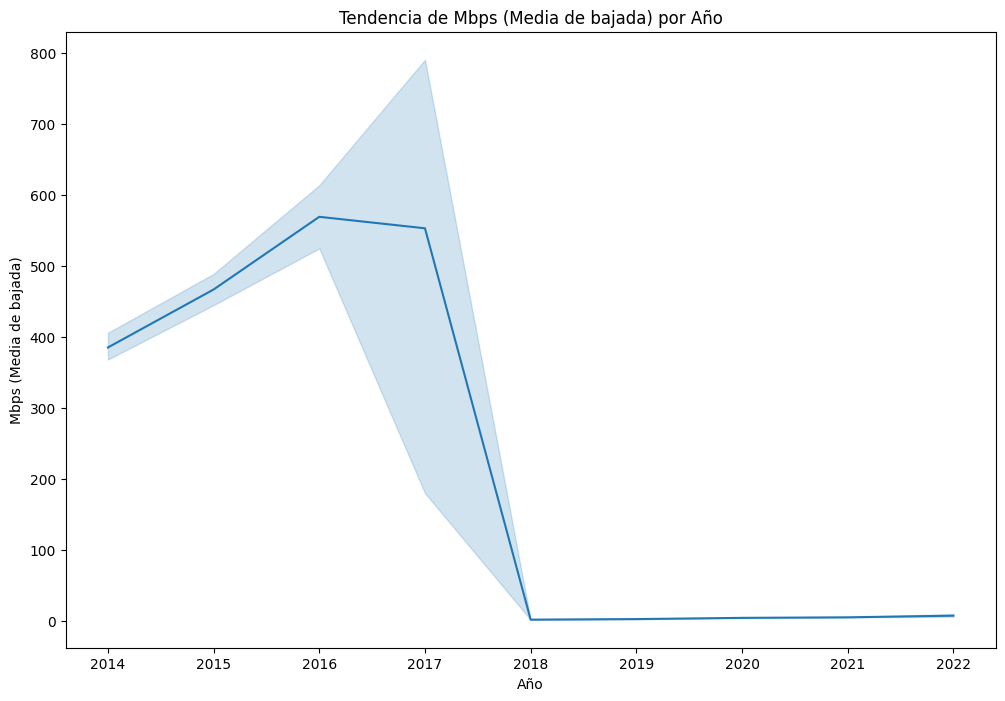

In [16]:
plt.figure(figsize=(12, 8))

# Crea un gráfico de líneas para todas las provincias
sns.lineplot(data=historico_velocidad, x='Año', y='Mbps (Media de bajada)')

plt.title("Tendencia de Mbps (Media de bajada) por Año")
plt.xlabel("Año")
plt.ylabel("Mbps (Media de bajada)")

plt.show()

Podemos notar a partir del cuarto trimestre del año 2017 que hay una caida abusiva que es muy poco probable, lo que creemos que sucede al ver que en los años anteriores el crecimiento de los 'Mbps (Media de bajada)' iba muy parejo creemos que a partir de esa fecha a los datos le faltaron cargar los decimales. 

Asi que vamos a proceder a corregir los datos

Multiplicamos por 1000 los datos que estaban mal 

In [17]:
historico_velocidad.loc[:20, 'Mbps (Media de bajada)'] *= 1000

In [18]:
historico_velocidad.head()

,Año,Trimestre,Mbps (Media de bajada)
0,2022,4,10656.0
1,2022,3,6246.0
2,2022,2,5844.0
3,2022,1,5511.0
4,2021,4,5234.0


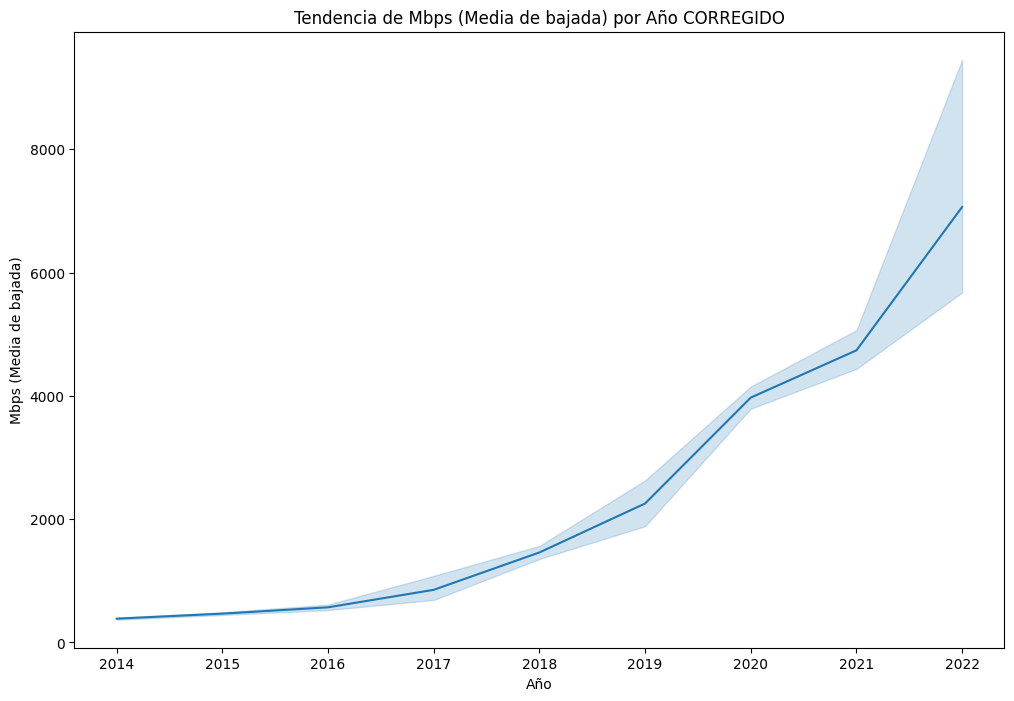

In [19]:
plt.figure(figsize=(12, 8))

# Crea un gráfico de líneas para todas las provincias
sns.lineplot(data=historico_velocidad, x='Año', y='Mbps (Media de bajada)')

plt.title("Tendencia de Mbps (Media de bajada) por Año CORREGIDO")
plt.xlabel("Año")
plt.ylabel("Mbps (Media de bajada)")

plt.show()

Podemos ver en este ultimo grafico que la data se acomoda mas a la realidad y asi es como deberia estar

------------------------------------------------------------------------------------------------------------------

# Historico velocidad internet (Completo)

------------------------------------------------------------------------------------------------------------------

In [20]:
historico_velocidad_1 = pd.read_csv('../Datasets/historico_velocidad_internet (1).csv')

In [21]:
historico_velocidad_1.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.000
1,2022,4,Capital Federal,18.286
2,2022,4,Catamarca,8.333
3,2022,4,Chaco,10.402
4,2022,4,Chubut,1.592


In [22]:
historico_velocidad_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


In [23]:
historico_velocidad_1['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [24]:
historico_velocidad_1['Año'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

## GRAFICOS

Hacemos graficos para ver la Tendencia de Mbps (Media de bajada) por Año (para todas las provincias)

Primero haremos un grafico de lineas y despues uno de cajas

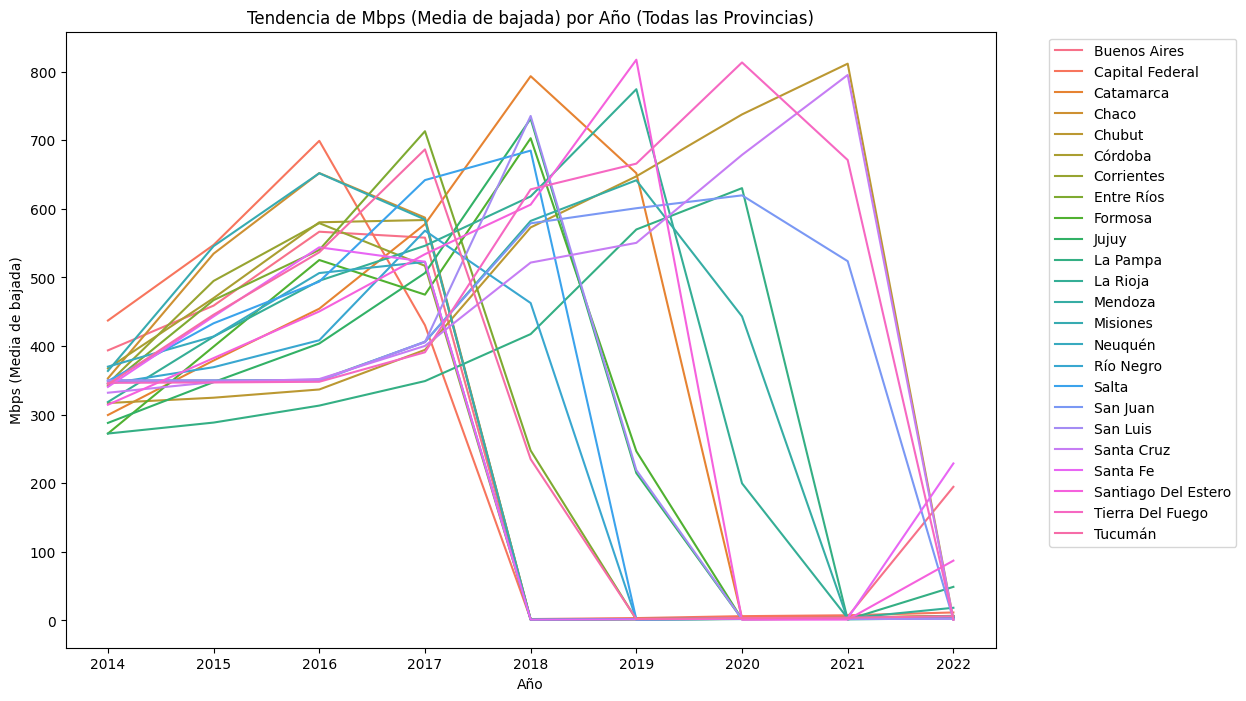

In [25]:
plt.figure(figsize=(12, 8))

# Crea un gráfico de líneas para todas las provincias
sns.lineplot(data=historico_velocidad_1, x='Año', y='Mbps (Media de bajada)', hue='Provincia', err_style=None)

plt.title("Tendencia de Mbps (Media de bajada) por Año (Todas las Provincias)")
plt.xlabel("Año")
plt.ylabel("Mbps (Media de bajada)")

# Ajusta la leyenda para que no se superponga
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

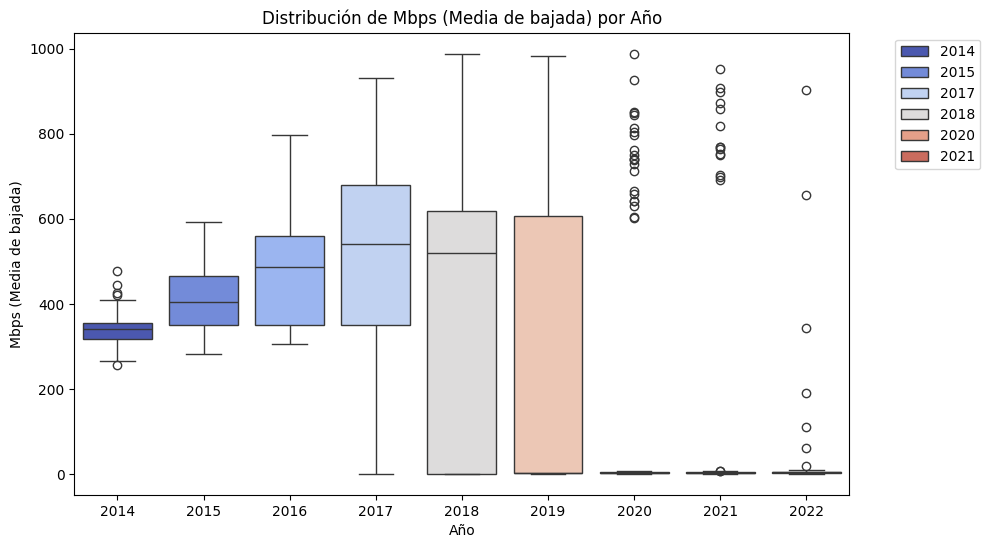

In [26]:
plt.figure(figsize=(10, 6))

# Crea un gráfico de cajas
sns.boxplot(data=historico_velocidad_1, x='Año', y='Mbps (Media de bajada)',hue= 'Año', palette='coolwarm')

plt.title("Distribución de Mbps (Media de bajada) por Año")
plt.xlabel("Año")
plt.ylabel("Mbps (Media de bajada)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Podemos notar que a partir del año 2018 hay una caida abrupta para muchisimas provincias de los mbps, y en el año 2020 fue una caida total para toda la Argentina y se mantuvo asi sacando algunas excepciones

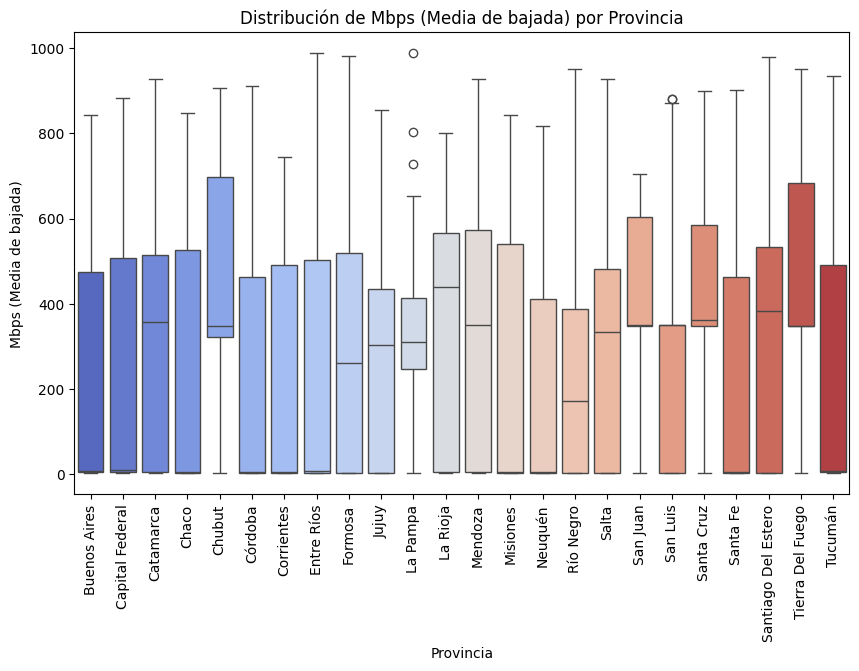

In [27]:
plt.figure(figsize=(10, 6))

# Crea un gráfico de cajas
sns.boxplot(data=historico_velocidad_1, x='Provincia', y='Mbps (Media de bajada)',hue= 'Provincia', palette='coolwarm')

plt.title("Distribución de Mbps (Media de bajada) por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Mbps (Media de bajada)")
plt.xticks(rotation=90)
plt.show()

En este ultimo grafico vemos los mbps por provincia y vemos algunas que estan normal pero lo mayoria de provincias tienden a tener muchos valores bajos

Esto se debe a una carga de los datos incorrecta. Pensamos que los datos mas bajos les faltan decimales y deberian ser valores incluso mayores a lo de los primeros años.
Eso daria como resultado provincias que se mantienen en el tiempo y otras que tienen un incremento lineal